In [1]:
from keras.datasets import mnist
data = mnist.load_data()

In [2]:
((xtrain,ytrain),(xtest,ytest)) = data

In [3]:
import matplotlib.pyplot as plt

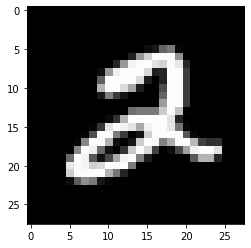

In [4]:
#This is an example of how the data looks
plt.imshow(xtrain[5].reshape(28,28), cmap = "gray")

In [5]:
#First Data Shape
xtrain[0].shape

(28, 28)

In [6]:
xtrain.shape

(60000, 28, 28)

In [7]:
#Reshaping the data in 1D as we have 2D image. That is from 28x28 to 784x1
xtrain = xtrain.reshape((xtrain.shape[0], 28*28)).astype("float32")
xtest = xtest.reshape((xtest.shape[0], 28*28)).astype("float32")

In [8]:
# Normalizing values from 0 - 255 to 0 - 1
xtrain = xtrain / 255
xtest = xtest / 255

In [9]:
from keras.utils import np_utils
print(ytest.shape)

ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

print(ytest.shape)

num_classes = ytest.shape[1]
print(num_classes)

(10000,)
(10000, 10)
10


In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(32, input_dim = 28*28, activation = "relu"))
model.add(Dense(64,activation = "relu"))

model.add(Dense(10,activation = "softmax"))

In [12]:
model.compile(loss = "categorical_crossentropy" , optimizer = "adam", metrics = "accuracy")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Train Model

model.fit(xtrain, ytrain, epochs = 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.7487 - accuracy: 0.7940
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2021 - accuracy: 0.9417
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1558 - accuracy: 0.9542
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1292 - accuracy: 0.9611
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9662
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9691
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9722
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9736
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9775
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9795

#### Check Model Performance

In [15]:
scores = model.evaluate(xtest, ytest)
scores

313/313 [==============================] - 1s 1ms/step - loss: 0.0991 - accuracy: 0.9692


[0.09905675798654556, 0.9692000150680542]